In [464]:
import os
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency
import seaborn as sns
from random import randrange, uniform
%matplotlib inline
from datetime import datetime

In [465]:
os.chdir('C:/Users/Jayandran/Documents/Ds-Project')

In [466]:
os.getcwd()

'C:\\Users\\Jayandran\\Documents\\Ds-Project'

In [467]:
#Extracting the excel file
df_ins=pd.read_csv("insurance_claims.csv",sep=",",encoding= "ISO-8859-1")

In [468]:
df_ins.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48,521585,2014-10-17,OH,250/500,1000,1406.91,0,466132,...,YES,71610,6510,13020,52080,Saab,92x,2004,Y,NaN
1,228,42,342868,2006-06-27,IN,250/500,2000,1197.22,5000000,468176,...,?,5070,780,780,3510,Mercedes,E400,2007,Y,NaN
2,134,29,687698,2000-09-06,OH,100/300,2000,1413.14,5000000,430632,...,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,NaN
3,256,41,227811,1990-05-25,IL,250/500,2000,1415.74,6000000,608117,...,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,NaN
4,228,44,367455,2014-06-06,IL,500/1000,1000,1583.91,6000000,610706,...,NO,6500,1300,650,4550,Accura,RSX,2009,N,NaN


In [470]:
#list1=["NaN,"?","null"]
for i in df_ins.columns:
    df_ins[i].replace("?",np.nan,inplace=True)
    #data[i].replace(0,np.nan,inplace=True)
df_ins.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48,521585,2014-10-17,OH,250/500,1000,1406.91,0,466132,...,YES,71610,6510,13020,52080,Saab,92x,2004,Y,NaN
1,228,42,342868,2006-06-27,IN,250/500,2000,1197.22,5000000,468176,...,NaN,5070,780,780,3510,Mercedes,E400,2007,Y,NaN
2,134,29,687698,2000-09-06,OH,100/300,2000,1413.14,5000000,430632,...,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,NaN
3,256,41,227811,1990-05-25,IL,250/500,2000,1415.74,6000000,608117,...,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,NaN
4,228,44,367455,2014-06-06,IL,500/1000,1000,1583.91,6000000,610706,...,NO,6500,1300,650,4550,Accura,RSX,2009,N,NaN


In [471]:
df_ins.isna().sum()

months_as_customer                0
age                               0
policy_number                     0
policy_bind_date                  0
policy_state                      0
policy_csl                        0
policy_deductable                 0
policy_annual_premium             0
umbrella_limit                    0
insured_zip                       0
insured_sex                       0
insured_education_level           0
insured_occupation                0
insured_hobbies                   0
insured_relationship              0
capital-gains                     0
capital-loss                      0
incident_date                     0
incident_type                     0
collision_type                  178
incident_severity                 0
authorities_contacted             0
incident_state                    0
incident_city                     0
incident_location                 0
incident_hour_of_the_day          0
number_of_vehicles_involved       0
property_damage             

In [472]:
#Dropping _c39 as values are Nan
#Dropping Property Damage as it provides no info. Previously property claims are present.
df_ins.drop(["property_damage","_c39"],axis=1,inplace=True)

# Missing_Value_Analysis

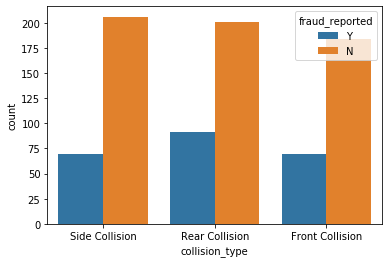

In [473]:
sns.countplot(x="collision_type",data=df_ins,hue="fraud_reported")

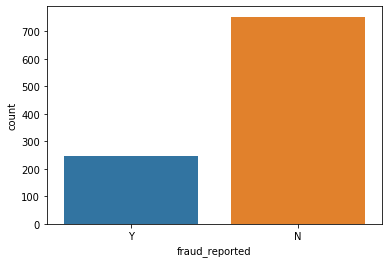

In [474]:
sns.countplot(x='fraud_reported',data=df_ins)

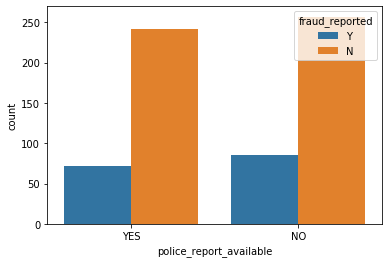

In [475]:
sns.countplot(x="police_report_available",data=df_ins,hue="fraud_reported")

In [476]:
df_ins.shape

(1000, 38)

In [477]:
#Imputing values for Collision type
#Neglecting collision type for Fraudulent_reported Yes..As the yes reported case is high and inbalanced, avoiding imputing the collision type for yes cases
ind=df_ins.index[(df_ins['fraud_reported']=="N") & (df_ins['collision_type'].isna())]


In [478]:
#Dropping collison type 162 rows.
df_ins.drop(ind,axis=0,inplace=True)

In [479]:
df_ins.shape

(838, 38)

In [481]:
from datetime import datetime
df_ins['policy_bind_date'] = pd.to_datetime(df_ins['policy_bind_date'],  errors='coerce')
df_ins['incident_date']=pd.to_datetime(df_ins['incident_date'],  errors='coerce')


In [482]:
df_ins['policy_Month']=df_ins['policy_bind_date'].dt.month
df_ins['policy_Year']=df_ins['policy_bind_date'].dt.year

df_ins['Inc_Month']=df_ins['incident_date'].dt.month
df_ins['Inc_Year']=df_ins['incident_date'].dt.year

In [483]:
df_ins.drop(['policy_bind_date','incident_date'],axis=1,inplace=True)

In [484]:
#Droping Inc Year as all occured on 2015
df_ins.drop('Inc_Year',axis=1,inplace=True)

In [485]:
#Converting months and year into object types
df_ins['policy_Month']=df_ins['policy_Month'].astype('object')
df_ins['policy_Year']=df_ins['policy_Year'].astype('object')
df_ins['Inc_Month']=df_ins['Inc_Month'].astype('object')

In [487]:
df_ins.isna().sum()

months_as_customer               0
age                              0
policy_number                    0
policy_state                     0
policy_csl                       0
policy_deductable                0
policy_annual_premium            0
umbrella_limit                   0
insured_zip                      0
insured_sex                      0
insured_education_level          0
insured_occupation               0
insured_hobbies                  0
insured_relationship             0
capital-gains                    0
capital-loss                     0
incident_type                    0
collision_type                  16
incident_severity                0
authorities_contacted            0
incident_state                   0
incident_city                    0
incident_location                0
incident_hour_of_the_day         0
number_of_vehicles_involved      0
bodily_injuries                  0
witnesses                        0
police_report_available        294
total_claim_amount  

# Converting cat var to cat type codes

In [488]:
df_ins['incident_hour_of_the_day']=df_ins['incident_hour_of_the_day'].astype('object')
df_ins['number_of_vehicles_involved']=df_ins['number_of_vehicles_involved'].astype('object')
df_ins['bodily_injuries']=df_ins['bodily_injuries'].astype('object')
df_ins['witnesses']=df_ins['witnesses'].astype('object')

In [489]:
lis=[]
for i in range (0,df_ins.shape[1]):
    print(i)
    if(df_ins.iloc[:,i].dtypes=='object'):
        df_ins.iloc[:,i]=pd.Categorical(df_ins.iloc[:,i])
        df_ins.iloc[:,i]=df_ins.iloc[:,i].cat.codes
        df_ins.iloc[:,i]=df_ins.iloc[:,i].astype('object')
        lis.append(df_ins.columns[i])

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38


In [490]:
lis

['policy_state',
 'policy_csl',
 'insured_sex',
 'insured_education_level',
 'insured_occupation',
 'insured_hobbies',
 'insured_relationship',
 'incident_type',
 'collision_type',
 'incident_severity',
 'authorities_contacted',
 'incident_state',
 'incident_city',
 'incident_location',
 'incident_hour_of_the_day',
 'number_of_vehicles_involved',
 'bodily_injuries',
 'witnesses',
 'police_report_available',
 'auto_make',
 'auto_model',
 'fraud_reported',
 'policy_Month',
 'policy_Year',
 'Inc_Month']

In [491]:
#Dropping Insured zip as it has many value counts and it isn't providing much info for fraud_claim
df_ins.drop('insured_zip',axis=1,inplace=True)

In [494]:
df_ins['collision_type'].value_counts()
#df_ins['police_report_available'].value_counts()


 1    292
 2    276
 0    254
-1     16
Name: collision_type, dtype: int64

In [495]:
df_ins.columns

Index(['months_as_customer', 'age', 'policy_number', 'policy_state',
       'policy_csl', 'policy_deductable', 'policy_annual_premium',
       'umbrella_limit', 'insured_sex', 'insured_education_level',
       'insured_occupation', 'insured_hobbies', 'insured_relationship',
       'capital-gains', 'capital-loss', 'incident_type', 'collision_type',
       'incident_severity', 'authorities_contacted', 'incident_state',
       'incident_city', 'incident_location', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'bodily_injuries', 'witnesses',
       'police_report_available', 'total_claim_amount', 'injury_claim',
       'property_claim', 'vehicle_claim', 'auto_make', 'auto_model',
       'auto_year', 'fraud_reported', 'policy_Month', 'policy_Year',
       'Inc_Month'],
      dtype='object')

In [496]:
#Dropping Police reported variable as the missing values are greater than 35% of total values
df_ins.drop('police_report_available', inplace=True,axis=1)

# Feature Engineering

In [497]:
#df_ins['Capital Loss or Gain']=df_ins['capital-gains']-df_ins['capital-loss']
df_ins['Capital_Loss_or_Gain']=0

df_ins['Capital_Loss_or_Gain']=df_ins['capital-gains']-abs(df_ins['capital-loss'])

In [498]:
df_ins.drop(['capital-gains','capital-loss'],axis=1,inplace=True)

In [499]:
df_ins['injury_claim']=np.where(df_ins['injury_claim']>0,1,0)

In [500]:
df_ins['property_claim']=np.where(df_ins['property_claim']>0,1,0)

In [501]:
df_ins['vehicle_claim']=np.where(df_ins['vehicle_claim']>0,1,0)

In [502]:
df_ins['injury_claim']=df_ins['injury_claim'].astype('object')

In [503]:
df_ins['property_claim']=df_ins['property_claim'].astype('object')

In [504]:
df_ins['vehicle_claim']=df_ins['vehicle_claim'].astype('object')

In [505]:
#Dropping Incident location as it is unique and doesn't add much value
df_ins.drop('incident_location',axis=1,inplace=True)

In [506]:
df_ins['auto_year']=df_ins['auto_year'].astype('object')

In [507]:
df_ins['auto_year']=pd.Categorical(df_ins['auto_year'])
df_ins['auto_year']=df_ins['auto_year'].cat.codes

In [508]:
df_ins['auto_year']=df_ins['auto_year'].astype('object')

In [509]:
df_ins.reset_index(inplace=True)
df_ins.drop('index', inplace=True,axis=1)

In [510]:
#Saving the policy number variable to a list and droping the variabe from data frame as it is a unique id for the policy
policy_num=df_ins['policy_number']
df_ins.drop('policy_number', inplace=True, axis=1)

In [511]:
#Need to impute 16 missing values to Collision type variable
#Replacing the Cat code -1 with Nan
df_ins['collision_type'].replace(-1,np.nan,inplace=True)


# KNN imputing collision variable

In [512]:
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=3)
df_ins = pd.DataFrame(imputer.fit_transform(df_ins), columns=df_ins.columns)

In [513]:
df_ins['collision_type'].value_counts()

1.000000    298
2.000000    277
0.000000    255
1.333333      5
0.666667      2
1.666667      1
Name: collision_type, dtype: int64

In [514]:
df_ins['collision_type']=df_ins['collision_type'].round()

In [515]:
df_ins['collision_type'].value_counts()

1.0    305
2.0    278
0.0    255
Name: collision_type, dtype: int64

In [516]:
#Converting All the cat variables to the type Object
lis.remove('police_report_available')
lis.remove('incident_location')

In [517]:
for i in lis:
    df_ins[i]=df_ins[i].astype('object')

In [518]:
df_ins['injury_claim']=df_ins['injury_claim'].astype('object')
df_ins['property_claim']=df_ins['property_claim'].astype('object')
df_ins['vehicle_claim']=df_ins['vehicle_claim'].astype('object')

In [519]:
df_ins['auto_make']=df_ins['auto_make'].astype('object')
df_ins['auto_model']=df_ins['auto_model'].astype('object')
df_ins['auto_year']=df_ins['auto_year'].astype('object')

# Feature Selection

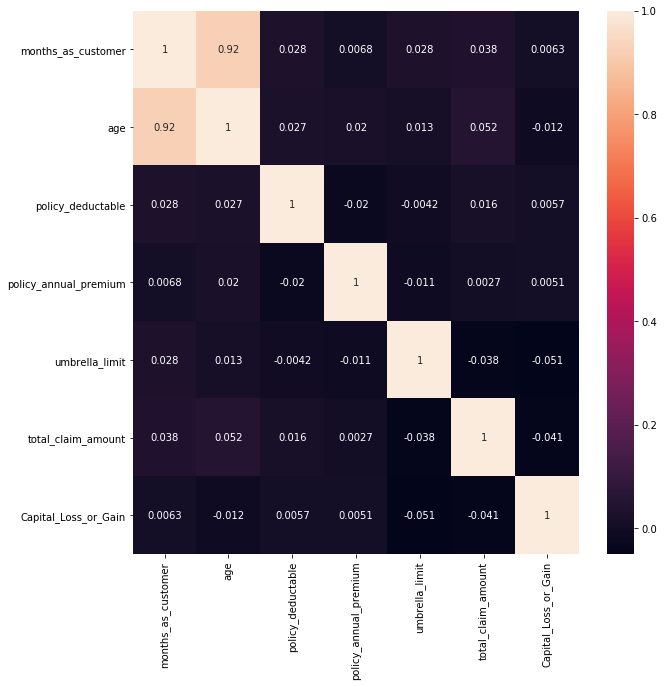

In [520]:
#Correlation analysis
plt.subplots(figsize=(10,10))
sns.heatmap(df_ins.corr(),annot=True)
#Age and months_as_customer are highly correlated

In [521]:
df_ins.columns

Index(['months_as_customer', 'age', 'policy_state', 'policy_csl',
       'policy_deductable', 'policy_annual_premium', 'umbrella_limit',
       'insured_sex', 'insured_education_level', 'insured_occupation',
       'insured_hobbies', 'insured_relationship', 'incident_type',
       'collision_type', 'incident_severity', 'authorities_contacted',
       'incident_state', 'incident_city', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'bodily_injuries', 'witnesses',
       'total_claim_amount', 'injury_claim', 'property_claim', 'vehicle_claim',
       'auto_make', 'auto_model', 'auto_year', 'fraud_reported',
       'policy_Month', 'policy_Year', 'Inc_Month', 'Capital_Loss_or_Gain'],
      dtype='object')

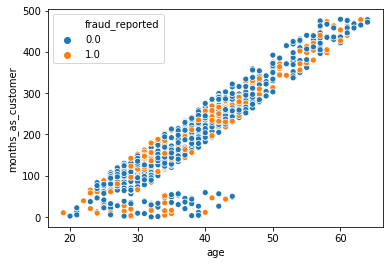

In [522]:
sns.scatterplot(x='age',y='months_as_customer',hue='fraud_reported',data=df_ins)


In [523]:
#From the above graph it is evident that the age and months_as_customer which asre not correlated has his num of not fraud report type
#Hence taking only age cat and categorising them btw below<20, 20-30, 30-40, 40-50, 50-60, 60-70
#Dropping Months_as_customer variable
df_ins.drop('months_as_customer',axis=1,inplace=True)
df_ins.reset_index(inplace=True)
df_ins.drop('index', inplace=True,axis=1)

In [524]:
lis1=['injury_claim', 'property_claim', 'vehicle_claim', 'auto_year']

In [525]:
lis.extend(lis1)

In [526]:
#Chi-sq contingency test - To determine significant categorical variable
from scipy.stats import chi2_contingency
list1=[]
list2=[]
for i in lis:
    chi2_stat, p_val, dof, ex = chi2_contingency(pd.crosstab(df_ins['fraud_reported'],df_ins[i]))
    if p_val > 0.05:
        list1.append(i)
    else:
        list2.append(i)

print(list2)
print(list1)

['insured_hobbies', 'incident_type', 'incident_severity', 'authorities_contacted', 'incident_state', 'fraud_reported']
['policy_state', 'policy_csl', 'insured_sex', 'insured_education_level', 'insured_occupation', 'insured_relationship', 'collision_type', 'incident_city', 'incident_hour_of_the_day', 'number_of_vehicles_involved', 'bodily_injuries', 'witnesses', 'auto_make', 'auto_model', 'policy_Month', 'policy_Year', 'Inc_Month', 'injury_claim', 'property_claim', 'vehicle_claim', 'auto_year']


In [527]:
#Eliminating insignificant categorical variables
df_ins=df_ins.drop(list1,axis=1)

In [533]:
df_ins['fraud_reported'].value_counts()

0.0    591
1.0    247
Name: fraud_reported, dtype: int64

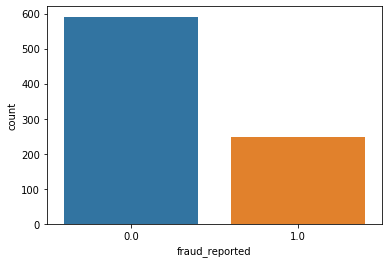

In [532]:
sns.countplot(x='fraud_reported',data=df_ins)

# Downsampling due to imbalanced categories

In [592]:
#Downsampling as it is imbalanced data set
from sklearn.utils import resample

df_majority = df_ins[df_ins.fraud_reported==0]
df_minority = df_ins[df_ins.fraud_reported==1]

#test sampling

#df_majority_test= data_test[data_train.CARAVAN==0]
#df_minority_test = data_test[data_train.CARAVAN==1]


# Downsample majority class
df_majority_downsampled = resample(df_majority, 
                                 replace=False,    # sample without replacement
                                 n_samples=400,     # to match minority class
                                 random_state=123) # reproducible results
 
 # reproducible results
# Combine minority class with downsampled majority class
df_downsampled = pd.concat([df_majority_downsampled, df_minority])
 

# Display new class counts
df_downsampled.fraud_reported.value_counts()
# 1    49

0.0    400
1.0    247
Name: fraud_reported, dtype: int64

In [593]:
df_downsampled.reset_index(inplace=True)
df_downsampled.drop('index', inplace=True,axis=1)

# Model building

In [594]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

In [595]:
X=df_downsampled.drop('fraud_reported',axis=1)
y=df_downsampled['fraud_reported'].astype('int')

In [596]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [641]:
clf=RandomForestClassifier(n_estimators=500)
clf.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=500,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [642]:
y_pred=clf.predict(X_test)

In [643]:
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("confusion:",metrics.confusion_matrix(y_test, y_pred))

Accuracy: 0.8307692307692308
confusion: [[110  22]
 [ 11  52]]


In [600]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
clf=DecisionTreeClassifier(criterion='entropy')
clf.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [601]:
y_pred=clf.predict(X_test)

In [602]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("confusion:",metrics.confusion_matrix(y_test, y_pred))

Accuracy: 0.7794871794871795
confusion: [[113  19]
 [ 24  39]]


In [603]:
from sklearn.linear_model import LogisticRegression
clf=LogisticRegression()
clf.fit(X_train,y_train)
y_pred=clf.predict(X_test)

In [604]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("confusion:",metrics.confusion_matrix(y_test, y_pred))

Accuracy: 0.6564102564102564
confusion: [[119  13]
 [ 54   9]]


# Among the models, Randomn forest came with good accuracy, TP and TN rates

#Accuracy: 0.8307692307692308
#confusion: [[110  22]
 #[ 11  52]]